In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import corner

from cmcrameri import cm
from matplotlib.colors import to_hex
from pqcd.utils import (
    to_nucleons_per_cubic_femtometre,
    GeV_per_cubic_femtometer_to_dyn_per_square_cm,
    nsat,
)

from plot_utils import rcparams
plt.rcParams.update(rcparams)

In [2]:
prior_c = '#cccccc'
gp0_c = to_hex('dimgray')
gp2_c = to_hex(cm.roma(0.9))

In [3]:
eps_lim = (0.5, 1.9)
p_lim = (0, 1.2)
n_lim = (1*nsat, 10*nsat)
cs2_lim = (0, 1)
M_lim = (1.4, 3.5)
R_lim = (5.7, 18.3)

In [4]:
hist_kwargs = {
    'density': True,
    'lw': 1.5
}

In [5]:
collated_eos_gp0 = pd.read_csv(
    '../data/eos-draws-default/eos-draws-default.csv',
    index_col='eos'
)
collated_eos_gp0_with_ntov = pd.read_csv(
    '../data/eos-draws-default/collated_np_all_post.csv',
    index_col='eos'
)
collated_eos_gp0['ntov'] = collated_eos_gp0_with_ntov['rhoc(M@Mmax)']
collated_eos_gp0['R2'] = collated_eos_gp0_with_ntov['R(M=2.0)']

astro_weights_gp0 = np.exp(
    collated_eos_gp0.logweight_total - collated_eos_gp0.logweight_total.max()
).values
astro_weights_gp0 /= max(astro_weights_gp0)

ntov_marg_weights_gp0 = np.loadtxt(
    '../data/eos-draws-default/pqcd-weights/pqcd_weights_ntov_marg.dat'
)

epstov_gp0 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/energy_density_ntov.dat',
)
ptov_gp0 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/pressure_ntov.dat',
)
ntov_gp0 = to_nucleons_per_cubic_femtometre(collated_eos_gp0['ntov']).values
cs2tov_gp0 = np.loadtxt(
    '../data/eos-draws-default/quantities_at_n/speed_of_sound_squared_ntov.dat',
)
Mtov_gp0 = collated_eos_gp0['Mmax'].values

In [6]:
gp0_stacked = np.vstack([
    epstov_gp0,
    ptov_gp0,
    ntov_gp0,
    cs2tov_gp0,
    Mtov_gp0,
]).T

In [7]:
collated_eos_gp1 = pd.read_csv(
    '../data/eos-draws-modified/gp1/eos-draws-modified-gp1.csv'
)

astro_weights_gp1 = np.exp(
    collated_eos_gp1.logweight_total - collated_eos_gp1.logweight_total.max()
).values
astro_weights_gp1 /= max(astro_weights_gp1)

epstov_gp1 = np.loadtxt(
    '../data/eos-draws-modified/gp1/quantities_at_n/energy_density_ntov.dat',
)
ptov_gp1 = np.loadtxt(
    '../data/eos-draws-modified/gp1/quantities_at_n/pressure_ntov.dat',
)
ntov_gp1 = np.loadtxt(
    '../data/eos-draws-modified/gp1/quantities_at_n/density_ntov.dat',
)
# cs2tov_gp1 = np.loadtxt(
#     '../data/eos-draws-modified/gp1/quantities_at_n/speed_of_sound_squared_ntov.dat',
# )
Mmax_gp1 = collated_eos_gp1['Mmax'].values

In [8]:
collated_eos_gp2 = pd.read_csv(
    '../data/eos-draws-modified/gp2/eos-draws-modified-gp2.csv'
)

astro_weights_gp2 = np.exp(
    collated_eos_gp2.logweight_total - collated_eos_gp2.logweight_total.max()
).values
astro_weights_gp2 /= max(astro_weights_gp2)

epstov_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/energy_density_ntov.dat',
)
ptov_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/pressure_ntov.dat',
)
ntov_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/density_ntov.dat',
)
cs2tov_gp2 = np.loadtxt(
    '../data/eos-draws-modified/gp2/quantities_at_n/speed_of_sound_squared_ntov.dat',
)
Mmax_gp2 = collated_eos_gp2['Mmax'].values

In [9]:
gp2_stacked = np.vstack([
    epstov_gp2,
    ptov_gp2,
    ntov_gp2,
    cs2tov_gp2,
    Mmax_gp2,
]).T

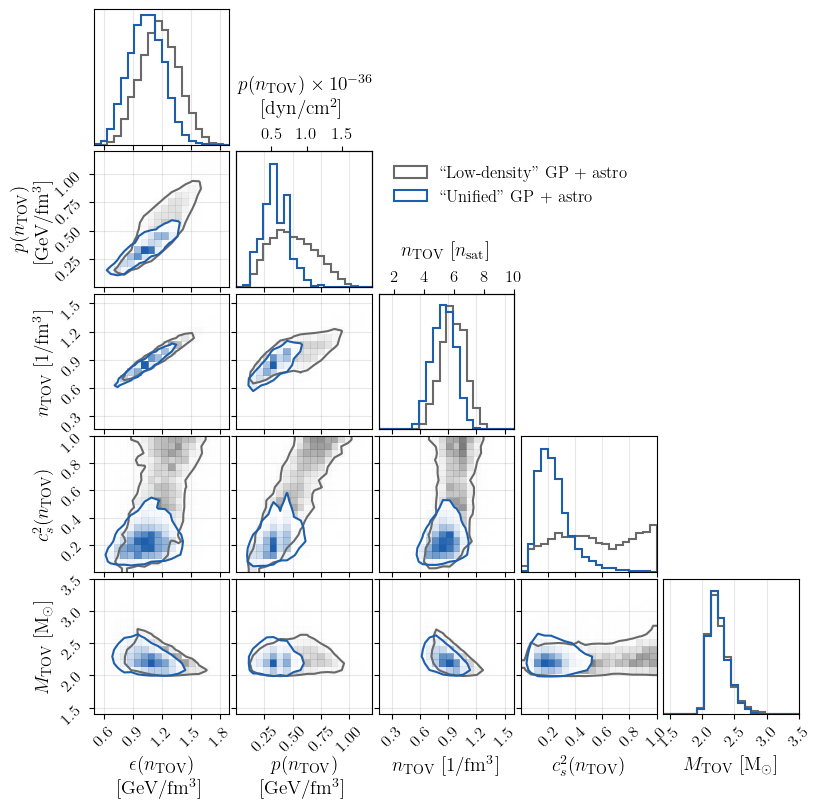

In [10]:
fig, axs = plt.subplots(5, 5, figsize=(8,8))

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

fig = corner.corner(
    gp0_stacked,
    labels=[
        '$\epsilon(n_\mathrm{TOV})$\n[GeV/fm$^3$]',
        '$p(n_\mathrm{TOV})$\n[GeV/fm$^3$]',
        r'$n_\mathrm{TOV}$ [1/fm$^3$]',
        r'$c_s^2(n_\mathrm{TOV})$',
        r'$M_\mathrm{TOV}$ [M$_\odot$]',
    ],
    range=[
        eps_lim,
        p_lim,
        n_lim,
        cs2_lim,
        M_lim,
    ],
    levels=[0.9],
    weights=astro_weights_gp0,
    plot_datapoints=False,
    color=gp0_c,
    hist_kwargs=hist_kwargs,
    fig=fig
)

ylim_e = axs[0,0].get_ylim()
ylim_n = axs[2,2].get_ylim()

corner.corner(
    gp2_stacked,
    fig=fig,
    range=[
        eps_lim,
        p_lim,
        n_lim,
        cs2_lim,
        M_lim,
    ],
    levels=[0.9],
    bins=20,
    weights=astro_weights_gp2,
    plot_datapoints=False,
    color=gp2_c,
    hist_kwargs={**hist_kwargs, 'color':gp2_c},
)

axs[0,0].set_ylim(ylim_e)
axs[2,2].set_ylim(ylim_n)

twiny_p = axs[1][1].twiny()
twiny_p.set_xlim(
    GeV_per_cubic_femtometer_to_dyn_per_square_cm(
        1e-36*np.array(axs[1][1].get_xlim())
    )
)
twiny_p.set_xticks([0.5, 1, 1.5])
twiny_p.set_xlabel('$p(n_\mathrm{TOV}) \\times 10^{-36}$\n[dyn/cm$^2$]', labelpad=10)

twiny = axs[2][2].twiny()
twiny.set_xlim(np.array(axs[2][2].get_xlim())/nsat)
twiny.set_xticks([2, 4, 6, 8, 10])
twiny.set_xlabel('$n_\mathrm{TOV}$ [$n_\mathrm{sat}$]', labelpad=10)

handles = [
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp0_c),
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp2_c),
]
labels = [
    "``Low-density'' GP + astro",
    "``Unified'' GP + astro"
]
axs[1,2].legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    frameon=False,
)

fig.savefig('figures/paper/tov_corner.pdf', bbox_inches='tight')

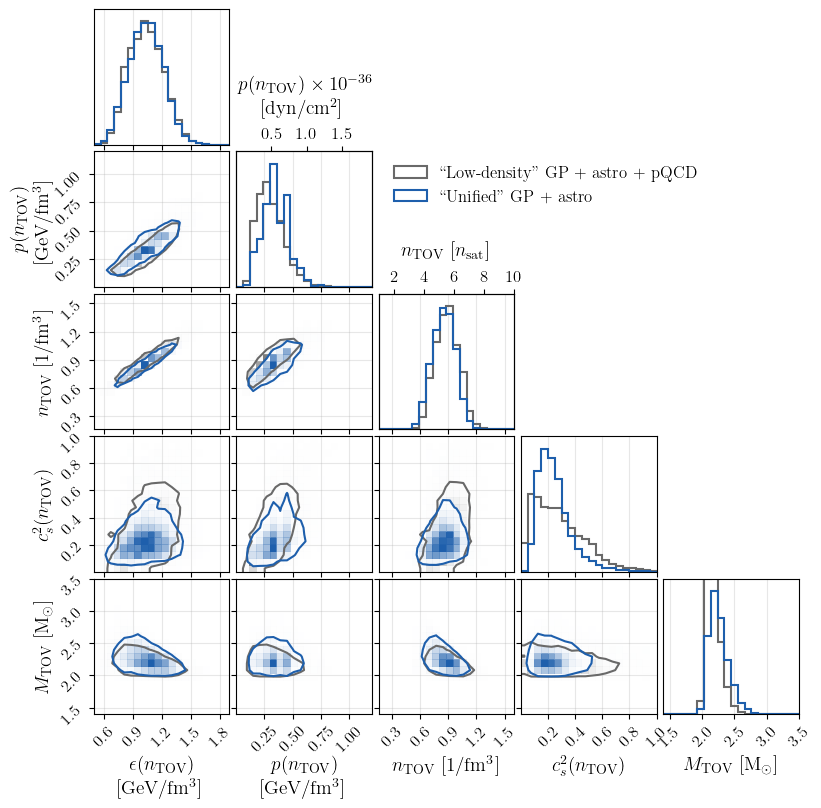

In [11]:
fig, axs = plt.subplots(5, 5, figsize=(8,8))

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(alpha=0.3)

fig = corner.corner(
    gp0_stacked,
    labels=[
        '$\epsilon(n_\mathrm{TOV})$\n[GeV/fm$^3$]',
        '$p(n_\mathrm{TOV})$\n[GeV/fm$^3$]',
        r'$n_\mathrm{TOV}$ [1/fm$^3$]',
        r'$c_s^2(n_\mathrm{TOV})$',
        r'$M_\mathrm{TOV}$ [M$_\odot$]',
    ],
    range=[
        eps_lim,
        p_lim,
        n_lim,
        cs2_lim,
        M_lim,
    ],
    levels=[0.9],
    weights=astro_weights_gp0*ntov_marg_weights_gp0,
    plot_datapoints=False,
    color=gp0_c,
    hist_kwargs=hist_kwargs,
    fig=fig
)

ylim_e = axs[0,0].get_ylim()
ylim_n = axs[2,2].get_ylim()

corner.corner(
    gp2_stacked,
    fig=fig,
    range=[
        eps_lim,
        p_lim,
        n_lim,
        cs2_lim,
        M_lim,
    ],
    levels=[0.9],
    bins=20,
    weights=astro_weights_gp2,
    plot_datapoints=False,
    color=gp2_c,
    hist_kwargs={**hist_kwargs, 'color':gp2_c},
)

axs[0,0].set_ylim(ylim_e)
axs[2,2].set_ylim(ylim_n)

twiny_p = axs[1][1].twiny()
twiny_p.set_xlim(
    GeV_per_cubic_femtometer_to_dyn_per_square_cm(
        1e-36*np.array(axs[1][1].get_xlim())
    )
)
twiny_p.set_xticks([0.5, 1, 1.5])
twiny_p.set_xlabel('$p(n_\mathrm{TOV}) \\times 10^{-36}$\n[dyn/cm$^2$]', labelpad=10)

twiny = axs[2][2].twiny()
twiny.set_xlim(np.array(axs[2][2].get_xlim())/nsat)
twiny.set_xticks([2, 4, 6, 8, 10])
twiny.set_xlabel('$n_\mathrm{TOV}$ [$n_\mathrm{sat}$]', labelpad=10)

handles = [
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp0_c),
    mpatches.Patch(fill=None, lw=1.5, edgecolor=gp2_c),
]
labels = [
    "``Low-density'' GP + astro + pQCD",
    "``Unified'' GP + astro"
]
axs[1,2].legend(
    handles=handles,
    labels=labels,
    loc='upper left',
    frameon=False,
)

# fig.savefig('figures/paper/tov_corner.pdf', bbox_inches='tight')

In [12]:
from pqcd.utils import weighted_quantile

In [13]:
q5, q50, q95 = weighted_quantile(
    epstov_gp0,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp0
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 0.8644664878902912, 1.177651123340581, 1.5066883476233122
1.18 + 0.33 - 0.31


In [14]:
q5, q50, q95 = weighted_quantile(
    epstov_gp2,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp2
)
print(f'GP2: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP2: 5th, 50th, 95th percentiles: 0.7561449274330625, 1.0406446521897086, 1.327062245340807
1.04 + 0.29 - 0.28


In [15]:
q5, q50, q95 = weighted_quantile(
    ntov_gp0/nsat,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp0
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 4.579853180569634, 5.944064766271227, 7.248962804768402
5.94 + 1.30 - 1.36


In [16]:
q5, q50, q95 = weighted_quantile(
    ntov_gp2/nsat,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp2
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 4.094457863893124, 5.355451381951176, 6.538084873496328
5.36 + 1.18 - 1.26


In [17]:
q5, q50, q95 = weighted_quantile(
    cs2tov_gp0,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp0
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 0.10434161542715442, 0.5242641307041359, 0.9686991685399936
0.52 + 0.44 - 0.42


In [18]:
q5, q50, q95 = weighted_quantile(
    cs2tov_gp2,
    quantiles=[0.05, 0.5, 0.95],
    weights=astro_weights_gp2
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 0.10255081183645083, 0.2254129528424637, 0.5022167576610992
0.23 + 0.28 - 0.12


In [19]:
q90_gp2 = weighted_quantile(
    cs2tov_gp2,
    quantiles=[0.90],
    weights=astro_weights_gp2
)
q90_gp0 = weighted_quantile(
    cs2tov_gp0,
    quantiles=[0.90],
    weights=astro_weights_gp0
)

In [20]:
q90_gp2, q90_gp0

(array([0.41187904]), array([0.93179904]))

In [21]:
q5, q50, q95 = weighted_quantile(
    Mtov_gp0,
    (0.05, 0.5, 0.95),
    astro_weights_gp0
)
print(f'GP0: 5th, 50th, 95th percentiles: {q5}, {q50}, {q95}')
print(f'{q50:.2f} + {q95-q50:.2f} - {q50-q5:.2f}')

GP0: 5th, 50th, 95th percentiles: 2.0605543767048786, 2.2354573785255454, 2.6003573584153705
2.24 + 0.36 - 0.17


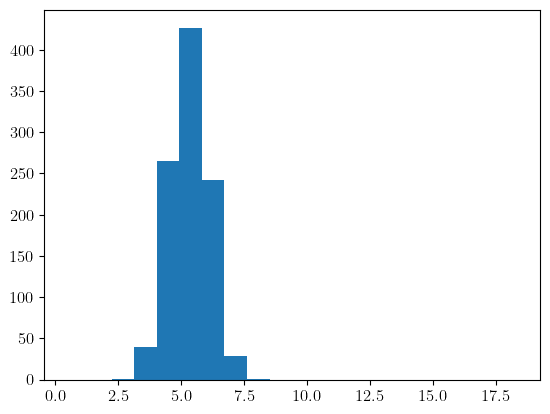

In [22]:
fig, ax = plt.subplots()
ax.hist(ntov_gp2/nsat, bins=20, weights=astro_weights_gp2);